# Statistical Analysis of Random Voltage Signals

## Objective
The objective of this experiment is to verify the relationship between mean power and variance of a random voltage signal, study the effect of different RMS values on the signal distribution, analyze the effect of adding a slowly varying sinusoidal signal, and observe the distribution of ensemble variances using numerical simulation.


## Theory

For a random voltage signal v(t) with zero mean, the average power is given by: **P = E[v^2(t)]**

The variance is defined as: **σ² = E[(v(t)- μ )^2]**

Since the signal has zero mean μ = 0, the variance simplifies to: **σ²= E[v^2(t)]**

The RMS value of the signal is: **RMS = √E[v^2(t)] = σ**

Thus, for a zero-mean signal, the mean power and variance are theoretically equal.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000   # number of samples
M = 200     # number of ensembles
t = np.linspace(0, 10, N)

np.random.seed(0)


## 1. Verification of Mean Power and Variance

A Gaussian random voltage signal with RMS = 1 is generated. The mean power and variance are computed and compared to verify that they are approximately equal.


Mean Power: 0.9756077773866701
Variance: 0.9752679753477971


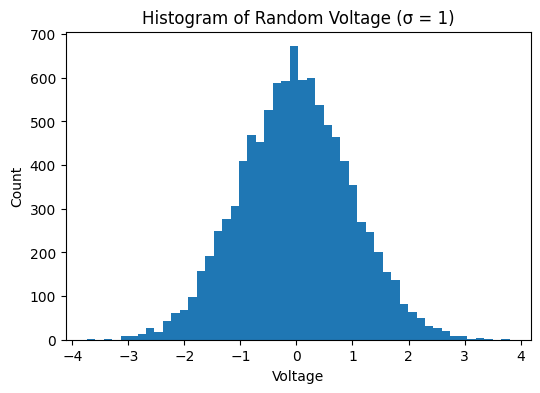

In [6]:
import numpy as np
import matplotlib.pyplot as plt

N = 10000   # number of samples
M = 200     # number of ensembles
t = np.linspace(0, 10, N)

np.random.seed(0)
sigma = 1
x = sigma * np.random.randn(N)

mean_power = np.mean(x**2)
variance = np.var(x)

print("Mean Power:", mean_power)
print("Variance:", variance)
plt.figure(figsize=(6,4))
plt.hist(x, bins=50)
plt.title("Histogram of Random Voltage (σ = 1)")
plt.xlabel("Voltage")
plt.ylabel("Count")
plt.show()

## 2. Effect of Different RMS Values on Histograms

To study the effect of RMS on the distribution of the voltage, the simulation was repeated for different RMS values (0.5, 1, and 2). For each case, a histogram of the voltage samples was plotted.

It was observed that as the *RMS value increases, the spread of the histogram also increases*. A smaller RMS produces a narrower distribution concentrated near zero, while a larger RMS produces a wider distribution with more dispersed values. This behavior is expected because the RMS value is directly related to the standard deviation of the signal, which determines the width of the Gaussian distribution.



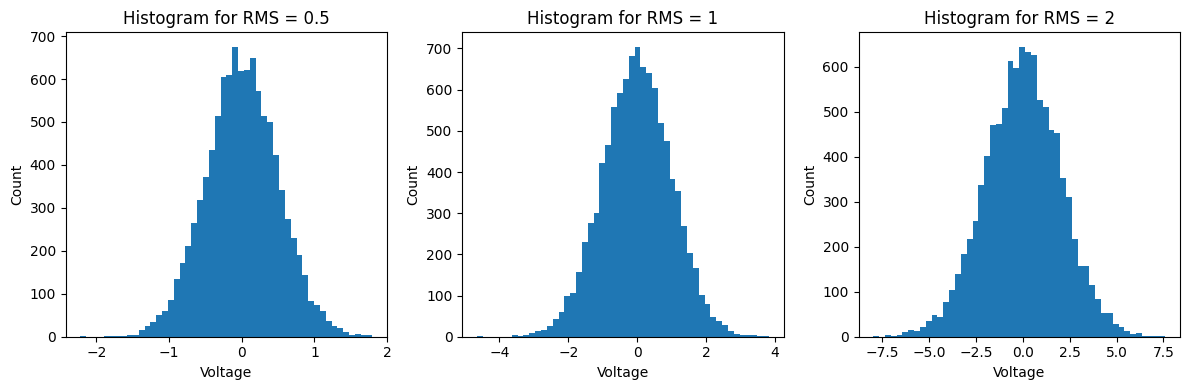

In [3]:
sigma_vals = [0.5, 1, 2]

plt.figure(figsize=(12,4))

for i, sigma in enumerate(sigma_vals):
    x = sigma * np.random.randn(N)
    plt.subplot(1,3,i+1)
    plt.hist(x, bins=50)
    plt.title(f"Histogram for RMS = {sigma}")
    plt.xlabel("Voltage")
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


## 3. Effect of Adding a Slowly Varying Sine Wave

When only noise is present, the histogram closely follows a Gaussian distribution centered at zero. However, after *adding the slowly varying sine wave, the histogram becomes broader and deviates from the ideal Gaussian shape*. This occurs because the sine wave introduces a time-varying mean to the signal. As a result, the overall histogram can be interpreted as a mixture of Gaussian distributions with different means corresponding to different phases of the sine wave.

Therefore, the presence of a slowly varying sinusoidal component modifies the statistical distribution of the signal and makes it **non-Gaussian** in nature.


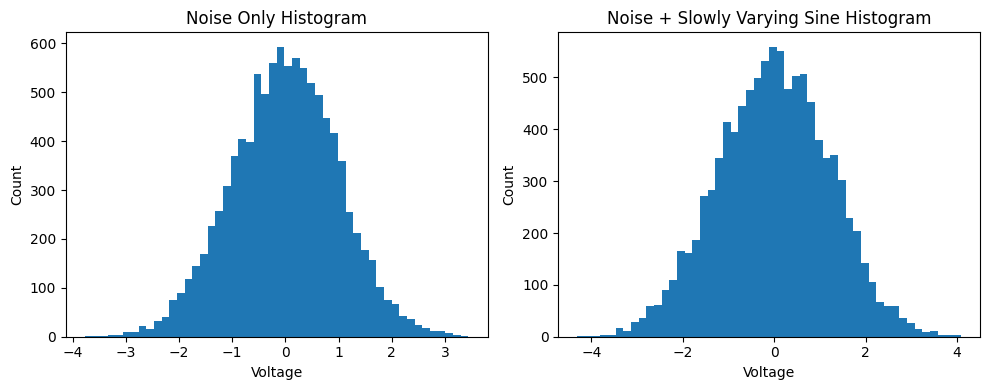

In [4]:
sigma = 1
noise = sigma * np.random.randn(N)
slow_sine = np.sin(2 * np.pi * 0.2 * t)

signal = noise + slow_sine
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(noise, bins=50)
plt.title("Noise Only Histogram")
plt.xlabel("Voltage")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.hist(signal, bins=50)
plt.title("Noise + Slowly Varying Sine Histogram")
plt.xlabel("Voltage")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

## 4. Distribution of Ensemble Variances

To analyze how the variance behaves across different realizations, multiple ensembles of the random signal were generated. For each ensemble, the sample variance was calculated and stored. A histogram was then plotted.

The resulting distribution of variances was centered around the true variance of the signal. This agrees with statistical theory, which states that the sample variance of a Gaussian random variable follows a **chi-square distribution**. Since each ensemble contains a large number of samples, the distribution of variances appears approximately symmetric and concentrated near the true variance value.

This result demonstrates that although individual realizations may produce slightly different variance values due to randomness, the *overall distribution remains centered *around the theoretical variance.


Mean of ensemble variances: 0.9989164110647992
True variance: 1


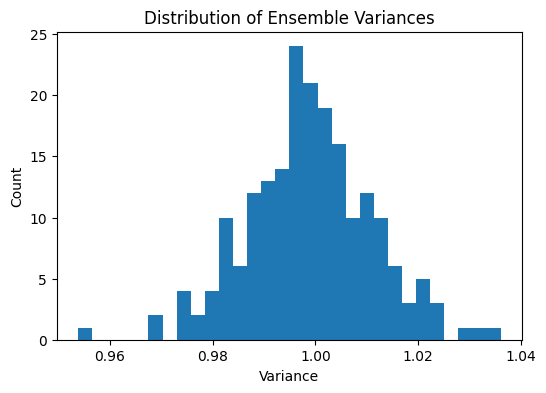

In [5]:
sigma = 1
variances = []

for _ in range(M):
    x = sigma * np.random.randn(N)
    variances.append(np.var(x))

variances = np.array(variances)

print("Mean of ensemble variances:", np.mean(variances))
print("True variance:", sigma**2)
plt.figure(figsize=(6,4))
plt.hist(variances, bins=30)
plt.title("Distribution of Ensemble Variances")
plt.xlabel("Variance")
plt.ylabel("Count")
plt.show()